In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy import stats

In [62]:
pip install imblearn

In [2]:
data = pd.read_csv('customer_churn.csv')

In [6]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
data = data[['Churn','SeniorCitizen','tenure','MonthlyCharges']]

In [11]:
data.head()

,Churn,SeniorCitizen,tenure,MonthlyCharges
0,No,0,1,29.85
1,No,0,34,56.95
2,Yes,0,2,53.85
3,No,0,45,42.30
4,Yes,0,2,70.70


In [44]:
Y = data['Churn']

In [ ]:
Y = pd.DataFrame(Y)

In [13]:
data_X = data.drop('Churn', axis = 1)

In [14]:
data_X.head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


In [15]:
data_X.columns[]

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

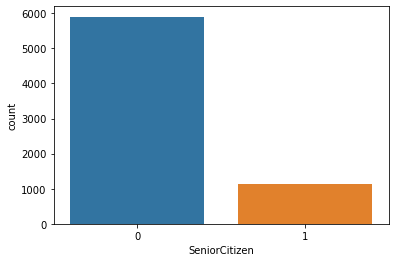

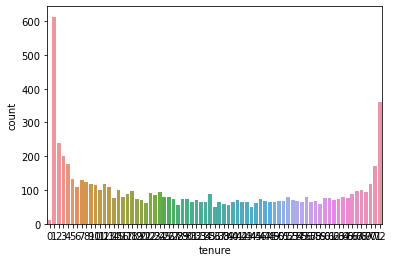

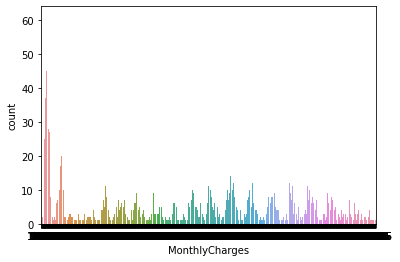

In [48]:
for val in data_X:
    sns.countplot(x=val, data=data_X)
    plt.show()

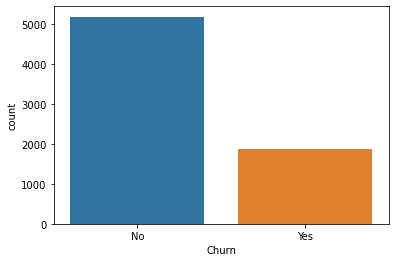

In [56]:
sns.countplot(x='Churn', data=Y)
plt.show()

In [17]:
X_Cat = data_X['SeniorCitizen']

In [38]:
X_Cat = pd.DataFrame(X_Cat)

In [18]:
X_Num = data_X[['tenure','MonthlyCharges']]

In [28]:
from sklearn.preprocessing import Normalizer
# from sklearn.preprocessing import StandardScaler
# Normalizing data
transformer = Normalizer().fit(X_Num)
x_normalized = transformer.transform(X_Num)
x = pd.DataFrame(x_normalized)

In [39]:
X = np.concatenate((x, X_Cat), axis=1)

In [42]:
x.shape

(7043, 2)

In [43]:
X_Cat.shape

(7043, 1)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=100)

In [46]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train, y_train)

In [47]:
classification.score(X_test, y_test)


0.7721788502484032

In [68]:
predictions = classification.predict(X_test)

In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[1842,  224],
       [ 418,  334]], dtype=int64)

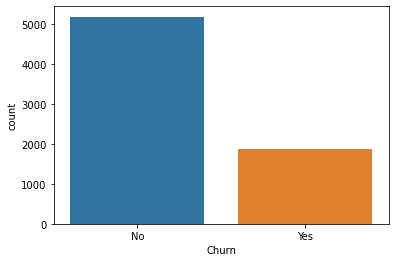

In [60]:
# Due to the data imbalance in Y:
sns.countplot(x='Churn', data=Y)
plt.show()

In [ ]:
# Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based 
# on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.
# SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [86]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
# X = churnData[['tenure', 'SeniorCitizen','MonthlyCharges']]
# transformer = StandardScaler().fit(X)
# X = transformer.transform(X)
# y = churnData['Churn']
X_sm, y_sm = smote.fit_sample(X_train, y_train)
y_sm.value_counts()

No     3108
Yes    3108
Name: Churn, dtype: int64

In [87]:
classification_sm = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_sm, y_sm)

In [106]:
classification_sm.score(X_test,y_test)

0.7139815471965933

In [107]:
predictions_sm = classification_sm.predict(X_sm)

In [108]:
cfm_sm = confusion_matrix(y_sm, predictions_sm)
cfm_sm

array([[2158,  950],
       [ 743, 2365]], dtype=int64)

In [109]:
cfm = confusion_matrix(y_test, predictions)
cfm

array([[1842,  224],
       [ 418,  334]], dtype=int64)

In [98]:
#precision for churn yes
precision = cfm[1,1] / (cfm[1,1]+cfm[1,0])
precision

0.4441489361702128

In [99]:
#precision for churn yes using smote
precision_sm = cfm_sm[1,1] / (cfm_sm[1,1]+cfm_sm[1,0])
precision_sm

0.760939510939511

In [102]:
# Tomek links are pairs of very close instances, but of opposite classes. 
# Removing the instances of the majority class of each pair increases the 
# space between the two classes, facilitating the classification process. 
# Apply imblearn.under_sampling.TomekLinks to the dataset. Build and 
# evaluate the logistic regression model. 
# Is it there any improvement?
from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_sample(X_train, y_train)
y_tl.value_counts()

No     2772
Yes    1117
Name: Churn, dtype: int64

In [105]:
y_train.value_counts()

No     3108
Yes    1117
Name: Churn, dtype: int64

In [110]:
classification_tl = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_tl, y_tl)

In [111]:
classification_tl.score(X_test,y_test)

0.7636621717530163

In [112]:
predictions_tl = classification_sm.predict(X_tl)

In [114]:
cfm_tl = confusion_matrix(y_tl, predictions_tl)
cfm_tl

array([[2034,  738],
       [ 263,  854]], dtype=int64)

In [115]:
precision_tl = cfm_tl[1,1] / (cfm_tl[1,1]+cfm_tl[1,0])
precision_tl

0.7645478961504029